In [3]:
# from torchvision import datasets, transforms
# def build_dataset():
#     train_dataset = datasets.CIFAR10(
#         root="../data",                                
#         train=True,
#         transform=transforms.ToTensor(),
#         download=True)
#     test_dataset = datasets.CIFAR10(
#         root="../data", 
#         train=False,
#         transform=transforms.ToTensor(),
#         download=True)
#     train_loader = torch.utils.data.DataLoader(
#         train_dataset,
#         batch_size=64, 
#         shuffle=True)
#     test_loader = torch.utils.data.DataLoader(
#         test_dataset,
#         batch_size=64, 
#         shuffle=True)
#     return train_dataset, test_dataset, train_loader, test_loader
# train_dataset = datasets.VOCDetection("../data", image_set="train", 
#                                       transform=transforms.ToTensor(), 
#                                       download=True)
# train_loader = torch.utils.data.DataLoader(
#         train_dataset,
#         batch_size=64, 
#         shuffle=True)

In [1]:
import torch
import torch.nn as nn
from torchxai.base import XaiBase, XaiHook, XaiModel
from collections import OrderedDict
from src.models import CnnMnist, ResNetMnist, ResNetMnistCBAM
import matplotlib.pyplot as plt

In [2]:
model = CnnMnist()
model2 = ResNetMnist()
model3 = ResNetMnistCBAM()
x = torch.randn(1, 1, 28, 28)
print("model")
o = model(x)
print(o.size())
print("model2")
o = model2(x)
print(o.size())
print("model3")
o = model3(x)
print(o.size())

model
torch.Size([1, 10])
model2
torch.Size([1, 10])
model3
torch.Size([1, 10])


---

In [3]:
from torchxai.model import GradCAM, DeconvNet, VanillaGrad, InputGrad, GuidedGrad, LRP
import matplotlib.pyplot as plt

In [4]:
kwargs_packs = {
    "gradcam": {
        "cnn": dict(layers_name=None, norm_mode=1),
        "resnet": dict(layers_name="relu_last", norm_mode=1),
        "resnetcbam": dict(layers_name="relu_last", norm_mode=1)
    },
    "guidedgrad": {
        "cnn": dict(module_name="convs", act=nn.ReLU),
        "resnet": dict(module_name=["resnet_layers", "relu"], act=nn.ReLU),
        "resnetcbam": dict(module_name=["resnet_layers", "relu"], act=nn.ReLU)
    },
    "relavance": {
        "cnn": dict(use_rho=False)
    },
    "deconv": {
        "cnn": dict(module_name="convs")
    }, 
    "vanillagrad": None, 
    "inputgrad": None,
}

def get_kwargs(a_type, m_type, kwargs_packs):
    pre_kwargs = kwargs_packs.get(a_type)
    if pre_kwargs is not None:
        kwargs = pre_kwargs.get(m_type)
    else:
        kwargs = {"<none>": None}
    return kwargs

## GradCAM

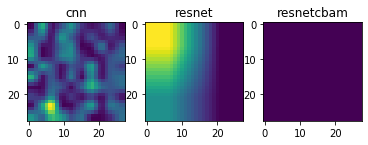

In [5]:
figure, axes = plt.subplots(1, 3)
x = torch.randn(1, 1, 28, 28)
targets = torch.LongTensor([2])
a_type = "gradcam"
for m_type, m, ax in zip(["cnn", "resnet", "resnetcbam"], 
                         [model, model2, model3], axes):
    kwargs = get_kwargs(a_type, m_type, kwargs_packs)
    gradcam_model = GradCAM(m, **kwargs)
    gradcam = gradcam_model.get_attribution(x, targets)
    ax.imshow(gradcam.squeeze())
    ax.set_title(m_type)
plt.show()

## GuidedGrad

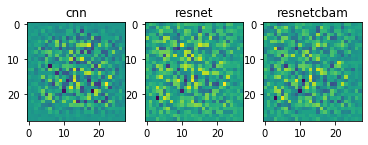

In [6]:
figure, axes = plt.subplots(1, 3)
x = torch.randn(1, 1, 28, 28)
targets = torch.LongTensor([2])
a_type = "guidedgrad"
for m_type, m, ax in zip(["cnn", "resnet", "resnetcbam"], 
                         [model, model2, model3], axes):
    kwargs = get_kwargs(a_type, m_type, kwargs_packs)
    guided_model = GuidedGrad(m, **kwargs)
    grad = guided_model.get_attribution(x, targets)
    ax.imshow(grad.squeeze())
    ax.set_title(m_type)
plt.show()

## VanillaGrad

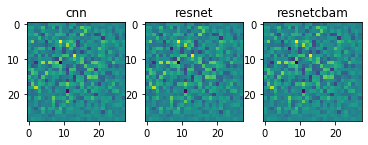

In [7]:
figure, axes = plt.subplots(1, 3)
x = torch.randn(1, 1, 28, 28)
targets = torch.LongTensor([2])
a_type = "vanillagrad"
for m_type, m, ax in zip(["cnn", "resnet", "resnetcbam"], 
                         [model, model2, model3], axes):
    kwargs = get_kwargs(a_type, m_type, kwargs_packs)
    vanillagrad = VanillaGrad(m, **kwargs)
    grad = guided_model.get_attribution(x, targets)
    ax.imshow(grad.squeeze())
    ax.set_title(m_type)
plt.show()

## InputGrad

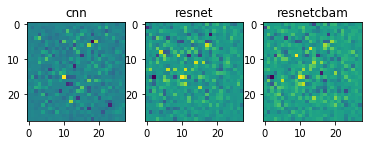

In [8]:
figure, axes = plt.subplots(1, 3)
x = torch.randn(1, 1, 28, 28)
targets = torch.LongTensor([2])
a_type = "inputgrad"
for m_type, m, ax in zip(["cnn", "resnet", "resnetcbam"], 
                         [model, model2, model3], axes):
    kwargs = get_kwargs(a_type, m_type, kwargs_packs)
    gradinput = InputGrad(m, **kwargs)
    grad = gradinput.get_attribution(x, targets)
    ax.imshow(grad.squeeze())
    ax.set_title(m_type)
plt.show()

## DeconvNet

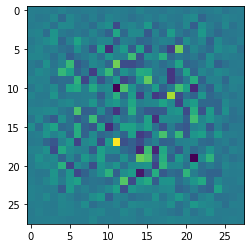

In [9]:
a_type = "deconv"
m_type = "cnn"
kwargs = get_kwargs(a_type, m_type, kwargs_packs)
deconvnet = DeconvNet(model, **kwargs)
deconv = deconvnet.get_attribution(x, targets)
plt.imshow(deconv.squeeze())
plt.show()

## LRP

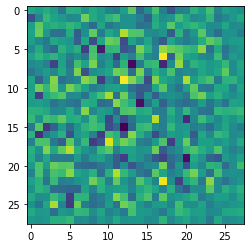

In [10]:
lrp_model = LRP(model)
lrp = lrp_model.get_attribution(x, targets)
plt.imshow(lrp.squeeze())
plt.show()